# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Mohamad Farrel Aryansyah
- **Email:** farrelaryansyah@gmail.com
- **ID Dicoding:** MC009D5Y2453

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda berdasarkan waktu dalam sehari?
- Seberapa besar pengaruh cuaca terhadap pola penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

Mengimport library yang dibutuhkan

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat dataset day.csv

In [130]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600




*   Hari kerja memiliki jumlah penyewaan total yang lebih tinggi dibandingkan akhir pekan, karena banyak orang menggunakan sepeda untuk bekerja atau sekolah.
*   Cuaca yang buruk (mendung, kelembapan tinggi, angin kencang) mengurangi jumlah penyewaan sepeda.



Memuat dataset hour.csv

In [131]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1




*   Penyewaan sepeda sangat rendah pada dini hari (00:00 - 04:00), baik untuk pengguna kasual maupun terdaftar.
*   Pengguna terdaftar lebih banyak dibandingkan pengguna kasual pada jam-jam dini hari, kemungkinan karena mereka menggunakan sepeda untuk keperluan pekerjaan atau perjalanan rutin.



### Assessing Data

Menampilkan ringkasan informasi tentang DataFrame day_df

In [132]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB




*   Dataset memiliki 731 baris dan 16 kolom
*   Kolom dteday (tanggal) bertipe object (string) → Bisa diubah menjadi tipe datetime untuk analisis berbasis waktu.
*   Beberapa nama kolom seperti 'dteday', 'yr', 'mnth', 'weathersit', 'hum' bisa diubah agar lebih mudah dibaca.





Mengecek jumlah baris duplikat dan menampilkan ringkasan statistik deskriptif

In [133]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000




*   Dataset tidak memiliki duplikasi.
*   Tidak ada data yang inaccurate value.



Menampilkan ringkasan informasi tentang DataFrame hour_df

In [134]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB




*   Dataset memiliki 17379 baris dan 17 kolom
*   Kolom dteday (tanggal) bertipe object (string) → Bisa diubah menjadi tipe datetime untuk analisis berbasis waktu.
*   Beberapa nama kolom seperti 'dteday', 'yr', 'mnth', 'weathersit', 'hum' bisa diubah agar lebih mudah dibaca.



Mengecek jumlah baris duplikat dan menampilkan ringkasan statistik deskriptif

In [135]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


*   Dataset tidak memiliki duplikasi.
*   Tidak ada data yang inaccurate value.

### Cleaning Data

Mengubah tipedata pada kolom 'dteday' ke datetime

In [136]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

Mengubah nama kolom pada day_df agar mudah untuk dibaca

In [137]:
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'hum': 'humidity',
}, inplace=True)

Menampilkan ringkasan struktur day_df

In [138]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   date          731 non-null    datetime64[ns]
 2   season        731 non-null    int64         
 3   year          731 non-null    int64         
 4   month         731 non-null    int64         
 5   holiday       731 non-null    int64         
 6   weekday       731 non-null    int64         
 7   workingday    731 non-null    int64         
 8   weather_cond  731 non-null    int64         
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  humidity      731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  casual        731 non-null    int64         
 14  registered    731 non-null    int64         
 15  cnt           731 non-null    int64     

Mengubah tipedata pada kolom 'dteday' ke datetime

In [139]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Mengubah nama kolom pada hour_df agar mudah untuk dibaca

In [140]:
hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'hum': 'humidity',
}, inplace=True)

Menampilkan ringkasan struktur hour_df

In [141]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   date          17379 non-null  datetime64[ns]
 2   season        17379 non-null  int64         
 3   year          17379 non-null  int64         
 4   month         17379 non-null  int64         
 5   hr            17379 non-null  int64         
 6   holiday       17379 non-null  int64         
 7   weekday       17379 non-null  int64         
 8   workingday    17379 non-null  int64         
 9   weather_cond  17379 non-null  int64         
 10  temp          17379 non-null  float64       
 11  atemp         17379 non-null  float64       
 12  humidity      17379 non-null  float64       
 13  windspeed     17379 non-null  float64       
 14  casual        17379 non-null  int64         
 15  registered    17379 non-null  int64 

Insight


*   Mengubah tipe data 'dteday' pada day_df, hour_df agar mempermudah proses analisis
*   Mengubah nama kolom 'dteday', 'yr', 'mnth', 'weathersit', 'hum' pada day_df dan hour_df agar lebih mudah dibaca.



## Exploratory Data Analysis (EDA)

### Explore ...

Mencari rata-rata jumlah penyewaan sepeda berdasarkan jam dalam sehari

In [142]:
hourly_avg_rentals = hour_df.groupby("hr")[["cnt", "casual", "registered"]].mean()
hourly_avg_rentals

,cnt,casual,registered
hr,,,
0,53.898072,10.158402,43.739669
1,33.375691,6.504144,26.871547
2,22.869930,4.772028,18.097902
3,11.727403,2.715925,9.011478
4,6.352941,1.253945,5.098996
5,19.889819,1.411437,18.478382
6,76.044138,4.161379,71.882759
7,212.064649,11.055021,201.009629
8,359.011004,21.679505,337.331499


*   Ada dua puncak penyewaan utama, yaitu pagi (07:00 - 09:00) dan sore (17:00 - 18:00), yang terutama didorong oleh pengguna terdaftar yang kemungkinan besar adalah pekerja atau pelajar.
*   Pengguna kasual lebih cenderung menggunakan sepeda di siang hari dan sore hari, mungkin untuk kegiatan santai atau rekreasi.
*   Penyewaan sangat rendah pada dini hari dan malam larut, menunjukkan bahwa sepeda lebih banyak digunakan untuk aktivitas harian daripada perjalanan malam.

Mencari pola penyewaan sepeda pada hari kerja dan akhir pekan

In [143]:
hourly_workingday = hour_df.groupby(["hr", "workingday"])[["cnt"]].mean().reset_index()
hourly_workingday

,hr,workingday,cnt
0,0,0,90.800000
1,0,1,36.786290
2,1,0,69.508696
3,1,1,16.552632
4,2,0,53.171053
5,2,1,8.683778
6,3,0,25.775330
7,3,1,4.942553
8,4,0,8.264317
9,4,1,5.429787


Pada hari kerja (workingday = 1), Pada akhir pekan (workingday = 0)
*   Hari kerja memiliki pola penyewaan yang jelas, dengan dua puncak utama pada pagi (berangkat kerja) dan sore (pulang kerja).
*   Akhir pekan memiliki pola lebih merata, dengan puncak penyewaan terjadi di siang hari untuk keperluan rekreasi.
*   Malam hari (setelah pukul 20:00) cenderung mengalami penurunan jumlah penyewaan di kedua jenis hari.

Mencari pola penyewaan antara pengguna terdaftar dan kasual

In [144]:
hourly_casual_registered = hour_df.groupby("hr")[["casual", "registered"]].mean()
hourly_casual_registered

,casual,registered
hr,,
0,10.158402,43.739669
1,6.504144,26.871547
2,4.772028,18.097902
3,2.715925,9.011478
4,1.253945,5.098996
5,1.411437,18.478382
6,4.161379,71.882759
7,11.055021,201.009629
8,21.679505,337.331499




*   Pengguna terdaftar lebih banyak menggunakan sepeda untuk keperluan transportasi rutin, seperti perjalanan ke kantor atau sekolah. Mereka memiliki dua puncak penyewaan utama:

      Pagi hari (07:00 - 09:00) → saat berangkat kerja/sekolah.
      Sore hari (17:00 - 18:00) → saat pulang kerja/sekolah.
      Pengguna kasual lebih banyak menggunakan sepeda untuk keperluan rekreasi atau bersantai, dengan puncak penyewaan terjadi di siang dan sore hari (10:00 - 16:00).
*   Pagi hari (07:00 - 09:00) → saat berangkat kerja/sekolah.
Sore hari (17:00 - 18:00) → saat pulang kerja/sekolah.
Pengguna kasual lebih banyak menggunakan sepeda untuk keperluan rekreasi atau bersantai, dengan puncak penyewaan terjadi di siang dan sore hari (10:00 - 16:00).
*   Penyewaan sepeda menurun drastis setelah pukul 20:00, terutama bagi pengguna kasual.





Menganalisis pola penyewaan berdasarkan waktu dalam sehari

In [145]:
hourly_rentals = hour_df.groupby("hr")["cnt"].mean()
hourly_rentals

,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004




*   Dua puncak utama penyewaan sepeda terjadi pada pukul 08:00 (jam berangkat kerja) dan 17:00 (jam pulang kerja).
*   Dua puncak utama penyewaan sepeda terjadi pada pukul 08:00 (jam berangkat kerja) dan 17:00 (jam pulang kerja).
*   Penyewaan sepeda meningkat secara bertahap setelah pagi dan mencapai puncak siang sekitar pukul 12:00 - 14:00, kemungkinan karena jam istirahat makan siang atau aktivitas santai.
*   Jam sibuk pagi (07:00 - 09:00) dan sore (17:00 - 18:00) menunjukkan bahwa banyak orang menggunakan sepeda sebagai alat transportasi utama.





Menganalisis pengaruh cuaca terhadap penyewaan

In [146]:
weather_rentals = hour_df.groupby("weather_cond")["cnt"].mean()
weather_rentals

,cnt
weather_cond,
1,204.869272
2,175.165493
3,111.579281
4,74.333333




*   Penyewaan sepeda paling tinggi saat cuaca cerah (204.87 penyewaan).
*   Jumlah penyewaan menurun seiring dengan memburuknya cuaca, terutama saat hujan.



## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penyewaan sepeda berdasarkan waktu dalam sehari?

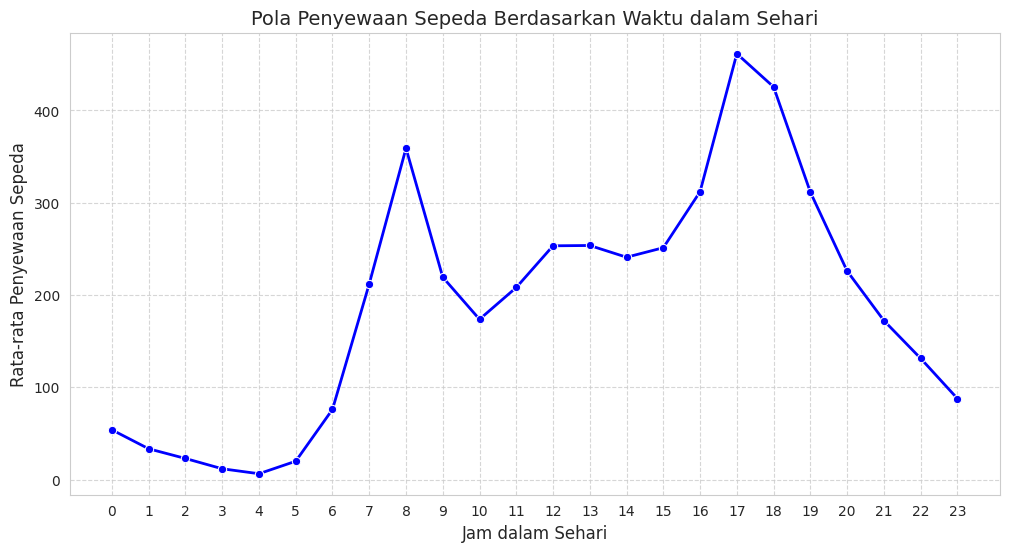

In [147]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker="o", linewidth=2, color="b")

plt.xlabel("Jam dalam Sehari", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.title("Pola Penyewaan Sepeda Berdasarkan Waktu dalam Sehari", fontsize=14)
plt.xticks(range(0, 24))
plt.grid(linestyle="--", alpha=0.8)
plt.show()



1.   Puncak Penyewaan pada Pagi & Sore Hari

  Terdapat dua puncak utama sekitar pukul 7-9 pagi dan 17-19 sore.
2.   Penyewaan Rendah di Tengah Malam & Dini Hari

  Jam 0-5 pagi memiliki penyewaan sangat rendah.
3. Penyewaan Stabil di Siang Hari

  Setelah puncak pagi, penyewaan menurun tetapi tetap cukup stabil dari pukul 10 pagi hingga 15 sore.


### Pertanyaan 2: Seberapa besar pengaruh cuaca terhadap pola penyewaan sepeda?

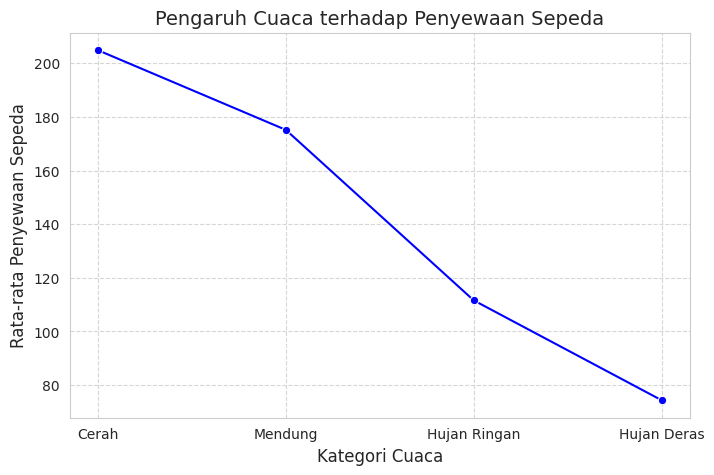

In [148]:
plt.figure(figsize=(8, 5))
sns.lineplot(
    x=["Cerah", "Mendung", "Hujan Ringan", "Hujan Deras"],  # Menggunakan label kategori langsung
    y=weather_rentals.values,
    marker="o",
    linestyle="-",
    color="b"
)

plt.xlabel("Kategori Cuaca", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda", fontsize=14)
plt.grid(linestyle="--", alpha=0.8)
plt.show()

1. Cuaca Cerah Meningkatkan Penyewaan

  Penyewaan sepeda tertinggi saat cuaca cerah. Ini menunjukkan bahwa orang lebih suka bersepeda saat kondisi cuaca mendukung.
2. Penurunan Saat Mendung dan Hujan Ringan

  Saat mendung, jumlah penyewaan sepeda mulai menurun, meskipun tidak drastis.
  Pengguna mungkin lebih berhati-hati atau memilih moda transportasi lain.
3. Penyewaan Drastis Turun saat Hujan Ringan & Hujan Deras

  Hujan ringan menyebabkan penurunan signifikan dalam jumlah penyewaan sepeda.
Hujan deras memiliki penyewaan sepeda terendah, menunjukkan bahwa pengguna menghindari bersepeda saat kondisi basah dan licin.

## Analisis Lanjutan (Opsional)

Analisis Lanjutan dengan Metode Clustering pola penyewaan berdasarkan waktu dalam sehari

In [149]:
def categorize_hour(hr):
    if hr in range(0, 5):
        return 'Dini Hari'
    elif hr in range(5, 10):
        return 'Pagi Hari'
    elif hr in range(10, 16):
        return 'Siang Hari'
    elif hr in range(16, 20):
        return 'Sore Hari'
    else:
        return 'Malam Hari'

hour_df['time_of_day'] = hour_df['hr'].apply(categorize_hour)

Visualisasi

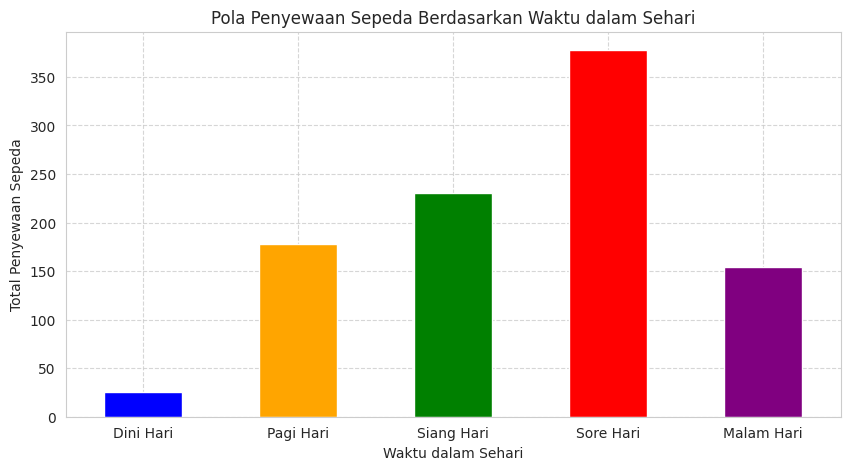

In [150]:
plt.figure(figsize=(10, 5))
time_trend = hour_df.groupby("time_of_day")["cnt"].mean().reindex(['Dini Hari', 'Pagi Hari', 'Siang Hari', 'Sore Hari', 'Malam Hari'])
time_trend.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple'])

plt.title("Pola Penyewaan Sepeda Berdasarkan Waktu dalam Sehari")
plt.xlabel("Waktu dalam Sehari")
plt.ylabel("Total Penyewaan Sepeda")
plt.xticks(rotation=0)
plt.grid(linestyle="--", alpha=0.8)
plt.show()

1. Puncak Penyewaan pada Pagi & Sore Hari

  Penyewaan meningkat tajam saat pagi (07:00 - 09:00) dan sore (17:00 - 19:00), kemungkinan besar karena jam kerja dan sekolah.

2. Penyewaan Stabil di Siang Hari

  Siang hari memiliki jumlah penyewaan yang relatif stabil, pengguna mungkin menggunakan sepeda untuk rekreasi atau aktivitas santai.

3. Penyewaan Terendah di Dini Hari & Malam Hari

  Jumlah penyewaan paling rendah terjadi pada dini hari (00:00 - 04:00) dan mulai menurun kembali setelah malam (20:00 - 23:00), mencerminkan aktivitas yang lebih sedikit pada jam-jam tersebut.


Analisis Lanjutan dengan Metode Clustering pola penyewaan berdasarkan kategori cuaca

In [151]:
def categorize_weather(cond):
    if cond == 1:
        return 'Cerah'
    elif cond == 2:
        return 'Mendung'
    elif cond == 3:
        return 'Hujan Ringan'
    else:
        return 'Hujan Deras'

hour_df['weather_category'] = hour_df['weather_cond'].apply(categorize_weather)

Visualisasi

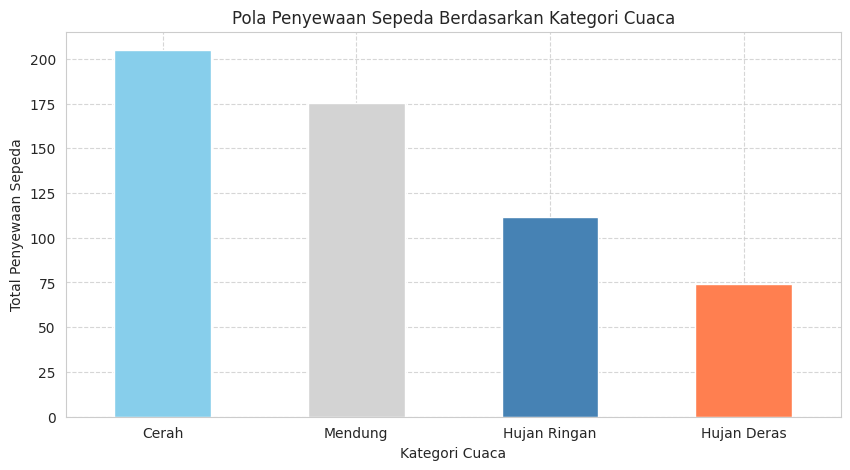

In [152]:
plt.figure(figsize=(10, 5))
weather_trend = hour_df.groupby("weather_category")["cnt"].mean().reindex(['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Deras'])

colors = ['skyblue', 'lightgray', 'steelblue', 'coral']
weather_trend.plot(kind='bar', color=colors)

plt.title("Pola Penyewaan Sepeda Berdasarkan Kategori Cuaca")
plt.xlabel("Kategori Cuaca")
plt.ylabel("Total Penyewaan Sepeda")
plt.xticks(rotation=0)
plt.grid(linestyle="--", alpha=0.8)
plt.show()

1. Cuaca Cerah Mendorong Penyewaan Tertinggi

  Jumlah penyewaan sepeda paling tinggi saat cuaca cerah, menunjukkan bahwa pengguna lebih nyaman bersepeda saat kondisi cuaca mendukung. Banyak pengguna yang menggunakan sepeda untuk rekreasi atau perjalanan santai.

2. Penyewaan Menurun Saat Cuaca Mendung

  Saat mendung, penyewaan sepeda mulai berkurang, kemungkinan karena ketidakpastian kondisi cuaca (potensi hujan). Meskipun demikian, jumlah penyewaan tidak turun drastis, yang berarti masih ada pengguna yang tetap menggunakan sepeda.

3. Hujan Ringan & Hujan Deras Menghambat Penyewaan

  Hujan ringan menyebabkan penurunan penyewaan yang cukup signifikan. Hujan deras memiliki jumlah penyewaan paling rendah, menunjukkan bahwa kondisi basah dan licin sangat mengurangi minat pengguna.

## Conclusion

- Bagaimana pola penyewaan sepeda berdasarkan waktu dalam sehari?

Dari pola penyewaan sepeda sepanjang hari, terlihat jelas bahwa ada dua waktu dengan lonjakan signifikan, yaitu pada pagi hari sekitar pukul 07:00 - 09:00 dan sore hari sekitar pukul 17:00 - 19:00. Fenomena ini mengindikasikan bahwa sepeda banyak digunakan sebagai alat transportasi utama untuk berangkat dan pulang kerja atau sekolah. Banyak orang tampaknya mengandalkan sepeda untuk menghindari kemacetan atau sebagai bagian dari moda transportasi mereka.

Sebaliknya, jumlah penyewaan sepeda cenderung rendah pada dini hari, terutama antara pukul 00:00 - 05:00. Hal ini wajar karena sebagian besar orang masih beristirahat. Sementara itu, pada siang hari antara pukul 10:00 - 16:00, jumlah penyewaan cenderung stabil meskipun tidak setinggi jam-jam sibuk. Pada periode ini, kemungkinan besar sepeda lebih banyak digunakan untuk aktivitas santai, rekreasi, atau perjalanan singkat.

Melihat pola ini, penting untuk memastikan ketersediaan sepeda yang cukup di jam-jam sibuk agar permintaan tetap terpenuhi. Selain itu, strategi seperti promo atau diskon pada dini hari/malam hari bisa menjadi cara untuk meningkatkan penggunaan sepeda di jam-jam sepi. Waktu-waktu dengan permintaan rendah juga bisa dimanfaatkan untuk perawatan dan perbaikan sepeda, agar kondisinya tetap optimal saat dibutuhkan.
- Seberapa besar pengaruh cuaca terhadap pola penyewaan sepeda?

Cuaca memiliki dampak besar terhadap pola penyewaan sepeda. Penyewaan tertinggi terjadi saat cuaca cerah, karena kondisi yang nyaman dan aman mendorong lebih banyak orang untuk bersepeda. Saat cuaca mendung, pola penyewaan sedikit menurun, tetapi masih cukup tinggi karena kondisi masih memungkinkan untuk bersepeda.  

Penurunan signifikan terjadi saat hujan ringan dan semakin drastis saat hujan deras. Faktor seperti jalanan licin dan visibilitas rendah membuat orang enggan menggunakan sepeda. Untuk mengatasi ini, penyedia layanan bisa menawarkan jas hujan, diskon di hari mendung, atau mengurangi jumlah sepeda yang tersedia saat hujan guna menyesuaikan permintaan.